# Handling imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.cluster import k_means, DBSCAN
from sklearn import  metrics
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import log_loss
from catboost import CatBoostClassifier

# loading data

In [3]:
train=pd.read_csv('training.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')

# data exploration

In [4]:
train.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [5]:
test.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Latitude,Longitude
0,2352,30,2,1,3,6,2,1,0,0,...,1,6,1,4,5,-1,1,4,-2.596421,32.913584
1,8208,53,1,1,3,1,2,1,0,1,...,2,-1,1,4,1,-1,1,4,-1.778303,34.062640
2,2785,23,2,1,3,5,1,1,0,0,...,1,4,1,4,1,-1,1,1,-1.851789,31.536866
3,2967,30,2,3,3,4,1,2,0,1,...,2,-1,2,-1,1,-1,1,4,-1.235656,34.229012
4,1697,28,2,1,5,4,2,1,0,0,...,1,4,1,6,4,3,1,2,-7.780934,35.691878


In [6]:
train.describe()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.559910,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,...,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255,1.799267
std,2731.120086,16.332148,0.496433,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,...,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322,1.196955
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4744.500000,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000,2.000000
75%,7105.000000,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,2.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
ID                             7094 non-null int64
Q1                             7094 non-null int64
Q2                             7094 non-null int64
Q3                             7094 non-null int64
Q4                             7094 non-null int64
Q5                             7094 non-null int64
Q6                             7094 non-null int64
Q7                             7094 non-null int64
Q8_1                           7094 non-null int64
Q8_2                           7094 non-null int64
Q8_3                           7094 non-null int64
Q8_4                           7094 non-null int64
Q8_5                           7094 non-null int64
Q8_6                           7094 non-null int64
Q8_7                           7094 non-null int64
Q8_8                           7094 non-null int64
Q8_9                           7094 non-null int64
Q8_10                     

In [8]:
train.isnull().sum()

ID                             0
Q1                             0
Q2                             0
Q3                             0
Q4                             0
Q5                             0
Q6                             0
Q7                             0
Q8_1                           0
Q8_2                           0
Q8_3                           0
Q8_4                           0
Q8_5                           0
Q8_6                           0
Q8_7                           0
Q8_8                           0
Q8_9                           0
Q8_10                          0
Q8_11                          0
Q9                             0
Q10                            0
Q11                            0
Q12                            0
Q13                            0
Q14                            0
Q15                            0
Q16                            0
Q17                            0
Q18                            0
Q19                            0
Latitude  

In [9]:
train.columns

Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Latitude', 'Longitude', 'mobile_money', 'savings', 'borrowing',
       'insurance', 'mobile_money_classification'],
      dtype='object')

In [10]:
test.columns

Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Latitude', 'Longitude'],
      dtype='object')

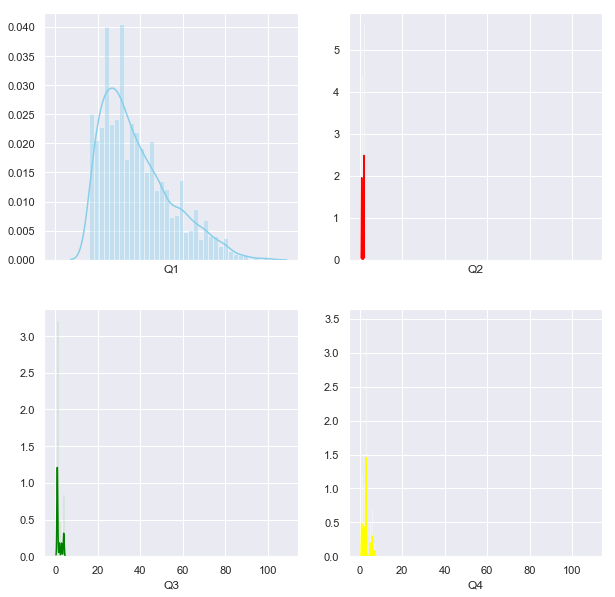

In [11]:
#plotting
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
sns.distplot(train.Q1,color='skyblue',label='Q1',ax=axes[0,0])
sns.distplot(train.Q2,color='red',label='Q2',ax=axes[0,1])
sns.distplot(train.Q3,color='green',label='Q3',ax=axes[1,0])
sns.distplot(train.Q4,color='yellow',label='Q4',ax=axes[1,1])

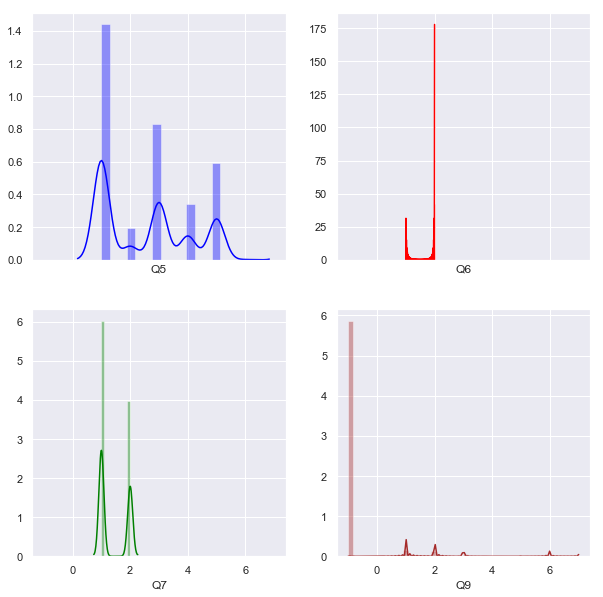

In [12]:
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
sns.distplot(train.Q5,color='blue',label='Q5',ax=axes[0,0])
sns.distplot(train.Q6,color='red',label='Q6',ax=axes[0,1])
sns.distplot(train.Q7,color='green',label='Q7',ax=axes[1,0])
sns.distplot(train.Q9,color='brown',label='Q9',ax=axes[1,1])

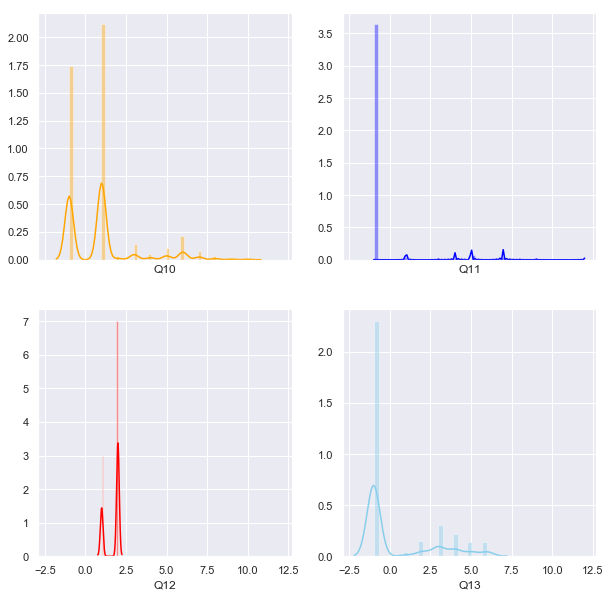

In [13]:
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
sns.distplot(train.Q10,color='orange',label='Q10',ax=axes[0,0])
sns.distplot(train.Q11,color='blue',label='Q11',ax=axes[0,1])
sns.distplot(train.Q12,color='red',label='Q12',ax=axes[1,0])
sns.distplot(train.Q13,color='skyblue',label='Q13',ax=axes[1,1])

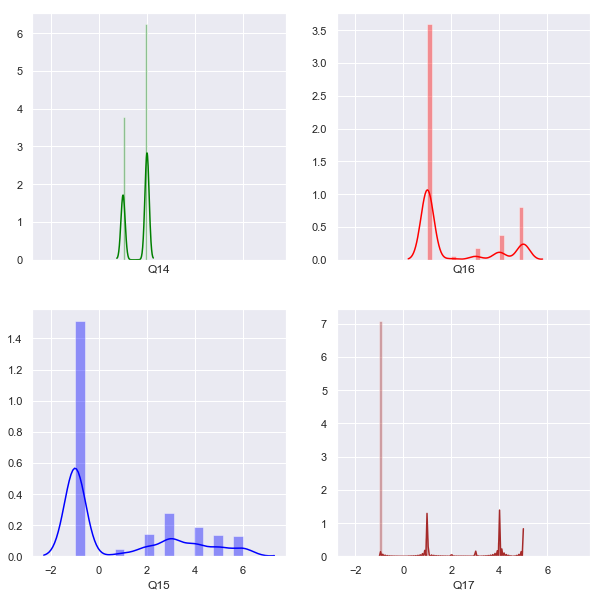

In [14]:
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
sns.distplot(train.Q14,color='green',label='Q14',ax=axes[0,0])
sns.distplot(train.Q15,color='blue',label='Q15',ax=axes[1,0])
sns.distplot(train.Q16,color='red',label='Q16',ax=axes[0,1])
sns.distplot(train.Q17,color='brown',label='Q17',ax=axes[1,1])

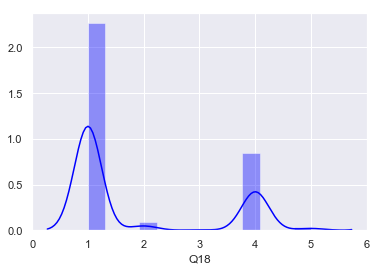

In [15]:
sns.distplot(train.Q18,color='blue',label='Q18')

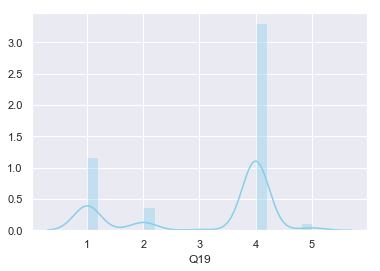

In [16]:
sns.distplot(train.Q19,color='skyblue',label='Q19')

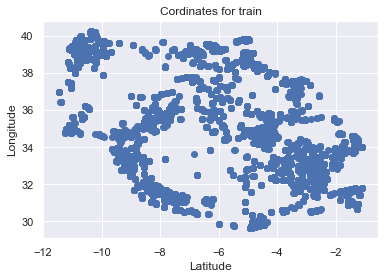

In [17]:
# plot cordinates
plt.scatter(train.Latitude, train.Longitude)
plt.title("Cordinates for train")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

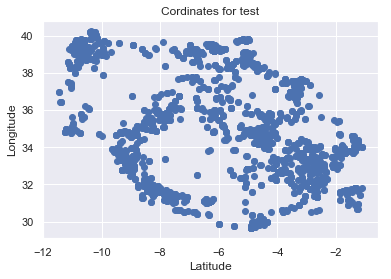

In [18]:
plt.scatter(test.Latitude, test.Longitude)
plt.title("Cordinates for test")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

# data cleaning and feature engineering

In [19]:
#convering numerical age to categorical
train_test_data=[train,test]
for dataset in train_test_data:
    dataset.loc[dataset['Q1']<=20,'Q1']=0
    dataset.loc[dataset['Q1']>20 &(dataset['Q1']<=40),'Q1']=1
    dataset.loc[dataset['Q1']>40 & (dataset['Q1']<=60),'Q1']=2
    dataset.loc[dataset['Q1']>60 & (dataset['Q1']<=80),'Q1']=3
    dataset.loc[dataset['Q1']>80,'Q1']=4

In [20]:
# create clusters based on location for training set
points = np.array([[train.Latitude[i], train.Longitude[i]]for i in range(len(train))]) 
cluster = k_means(points,n_clusters=19,random_state=1990)
cluster_labels = cluster[1]
train["cord_clusters"] = cluster_labels

In [21]:
## create clusters based on location for testing set
points = np.array([[test.Latitude[i], test.Longitude[i]]for i in range(len(test))]) 
cluster = k_means(points,n_clusters=19,random_state=1990)
cluster_labels = cluster[1]
test["cord_clusters"] = cluster_labels

In [22]:
train.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification,cord_clusters
0,5086,3,2,3,1,1,2,2,0,0,...,4,4,-4.460442,29.811396,0,0,0,0,0,11
1,1258,3,1,1,3,5,1,1,1,0,...,1,4,-6.176438,39.244871,1,1,1,0,3,0
2,331,0,2,4,6,3,2,1,0,0,...,1,1,-6.825702,37.652798,1,0,0,0,2,16
3,6729,3,1,1,3,1,1,1,0,0,...,1,4,-3.372049,35.808307,1,0,1,0,3,5
4,8671,3,1,1,1,1,2,1,0,1,...,1,4,-7.179645,31.039095,1,1,0,1,3,6


In [23]:
test.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Latitude,Longitude,cord_clusters
0,2352,3,2,1,3,6,2,1,0,0,...,6,1,4,5,-1,1,4,-2.596421,32.913584,16
1,8208,3,1,1,3,1,2,1,0,1,...,-1,1,4,1,-1,1,4,-1.778303,34.062640,10
2,2785,3,2,1,3,5,1,1,0,0,...,4,1,4,1,-1,1,1,-1.851789,31.536866,1
3,2967,3,2,3,3,4,1,2,0,1,...,-1,2,-1,1,-1,1,4,-1.235656,34.229012,10
4,1697,3,2,1,5,4,2,1,0,0,...,4,1,6,4,3,1,2,-7.780934,35.691878,5


# creating new features

In [24]:
import geopandas as gpd #
from shapely.geometry  import Point, Polygon

# loading tanzania shape file from (https://mapcruzin.com/tanzania-shapefiles/places.zip)

In [25]:
place_map = gpd.read_file("places/places.dbf")

In [26]:
place_map.head()

,osm_id,name,type,population,geometry
0,27251888,Nungwi,town,NaN,POINT (39.2992196 -5.7263516)
1,27251889,Kilindi,village,NaN,POINT (39.2875384 -5.8748854)
2,27251989,Mahonda,town,NaN,POINT (39.2499504 -5.9883421)
3,27252328,Bububu,village,NaN,POINT (39.2333403 -6.0925248)
4,27252361,Stone Town,city,NaN,POINT (39.1932987 -6.1634405)


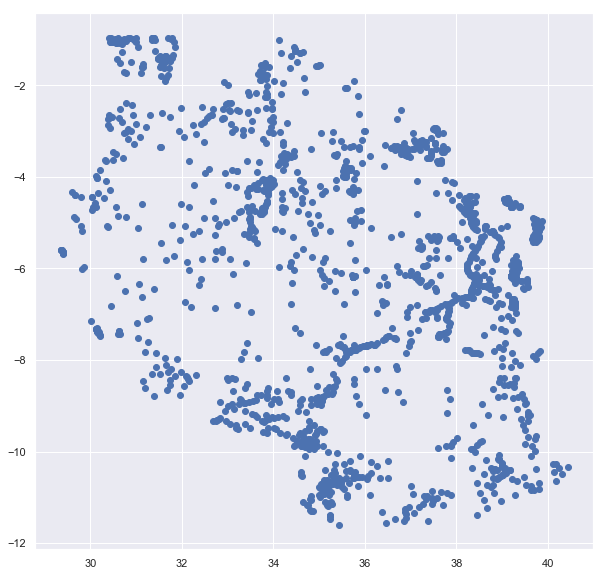

In [27]:
fig,ax = plt.subplots(figsize=(10,10))
place_map.plot(ax=ax)

In [28]:
# read mobile money agents dataset
mobile_money_agents = pd.read_csv("FSDT_FinAccessMapping/mobilemoney_agents_for_upload_win.csv",encoding="latin")

C:\Users\_kandagor\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (26,32,33,42,74) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
mobile_money_agents.region.unique()

array(['Ruvuma', 'Kilimanjaro', 'Dar es Salaam', 'Mbeya', 'Arusha',
       'Pwani', 'Morogoro', 'Mwanza', 'Mara', 'Manyara', 'Iringa',
       'Tanga', 'Shinyanga', 'Singida', 'Tabora', 'Lindi', 'Kigoma',
       'Mtwara', 'Dodoma', nan, 'Rukwa', 'Kagera', 'Zanzibar'],
      dtype=object)

In [30]:
# concantanate gps points
geometry = [Point(xy) for xy in zip(mobile_money_agents.longitude,mobile_money_agents.latitude)]
geometry[:2]

In [31]:
geo_df = gpd.GeoDataFrame(mobile_money_agents,geometry=geometry)
geo_df.head(2)

,region,district,ward,latitude,longitude,agent_name,till_operator,agent_type,standalone_or_other_business,other_business_type,...,other_local_services_details,branding_but_no_service,branding_but_no_service_mpesa,branding_but_no_service_tigo_pesa,branding_but_no_service_ezy_pesa,branding_but_no_service_airtel_money,branding_but_no_service_max_malipo,branding_but_no_service_selcom,branding_but_no_service_button Pay,geometry
0,Ruvuma,Tunduru,Kalulu,-10.28298,40.18363,Yusuph Shop,employee,Aggregated,Standalone agent,NaN,...,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,POINT (40.18363 -10.28298)
1,Ruvuma,Tunduru,Kalulu,-10.28457,40.18295,Abdulazak Shop,owner,Aggregated,Other business,Duka,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (40.18295 -10.28457)


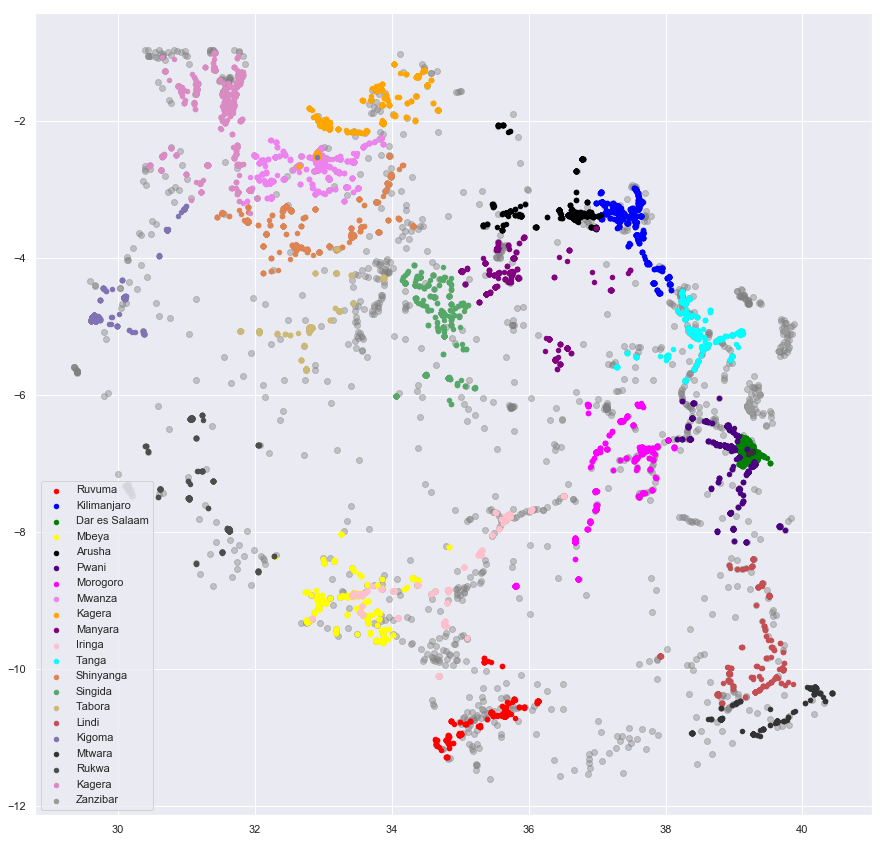

In [32]:
# plotting agents location
fig,ax = plt.subplots(figsize=(15,15))
place_map.plot(ax=ax,alpha=0.4, color = "grey")
geo_df[geo_df['region']=='Ruvuma'].plot(ax=ax, markersize=20,color='red',label='Ruvuma')
geo_df[geo_df['region']=='Kilimanjaro'].plot(ax=ax, markersize=20,color='blue',label='Kilimanjaro')
geo_df[geo_df['region']=='Dar es Salaam'].plot(ax=ax, markersize=20,color='green',label='Dar es Salaam')
geo_df[geo_df['region']=='Mbeya'].plot(ax=ax, markersize=20,color='yellow',label='Mbeya')
geo_df[geo_df['region']=='Arusha'].plot(ax=ax, markersize=20,color='black',label='Arusha')
geo_df[geo_df['region']=='Pwani'].plot(ax=ax, markersize=20,color='indigo',label='Pwani')
geo_df[geo_df['region']=='Morogoro'].plot(ax=ax, markersize=20,color='magenta',label='Morogoro')
geo_df[geo_df['region']=='Mwanza'].plot(ax=ax, markersize=20,color='violet',label='Mwanza')
geo_df[geo_df['region']=='Mara'].plot(ax=ax, markersize=20,color='orange',label='Kagera')
geo_df[geo_df['region']=='Manyara'].plot(ax=ax, markersize=20,color='purple',label='Manyara')
geo_df[geo_df['region']=='Iringa'].plot(ax=ax, markersize=20,color='pink',label='Iringa')
geo_df[geo_df['region']=='Tanga'].plot(ax=ax, markersize=20,color='cyan',label='Tanga')
geo_df[geo_df['region']=='Shinyanga'].plot(ax=ax, markersize=20,color='C1',label='Shinyanga')
geo_df[geo_df['region']=='Singida'].plot(ax=ax, markersize=20,color='C2',label='Singida')
geo_df[geo_df['region']=='Tabora'].plot(ax=ax, markersize=20,color='C8',label='Tabora')
geo_df[geo_df['region']=='Lindi'].plot(ax=ax, markersize=20,color='C3',label='Lindi')
geo_df[geo_df['region']=='Kigoma'].plot(ax=ax, markersize=20,color='C4',label='Kigoma')
geo_df[geo_df['region']=='Mtwara'].plot(ax=ax, markersize=20,color='0.2',label='Mtwara')
geo_df[geo_df['region']=='Rukwa'].plot(ax=ax, markersize=20,color='0.3',label='Rukwa')
geo_df[geo_df['region']=='Kagera'].plot(ax=ax, markersize=20,color='C6',label='Kagera')
geo_df[geo_df['region']=='Zanzibar'].plot(ax=ax, markersize=20,color='0.6',label='Zanzibar')
plt.savefig("Mobile_noney_agent_Location.jpg")
plt.legend()

# create another geo data for train set

In [33]:
# concantanate gps points
geometry = [Point(xy) for xy in zip(train.Longitude,train.Latitude)]
geometry[:2]

In [34]:
geo_df = gpd.GeoDataFrame(train,geometry=geometry)
geo_df.head(2)

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification,cord_clusters,geometry
0,5086,3,2,3,1,1,2,2,0,0,...,4,-4.460442,29.811396,0,0,0,0,0,11,POINT (29.8113964 -4.46044192)
1,1258,3,1,1,3,5,1,1,1,0,...,4,-6.176438,39.244871,1,1,1,0,3,0,POINT (39.24487062 -6.17643812)


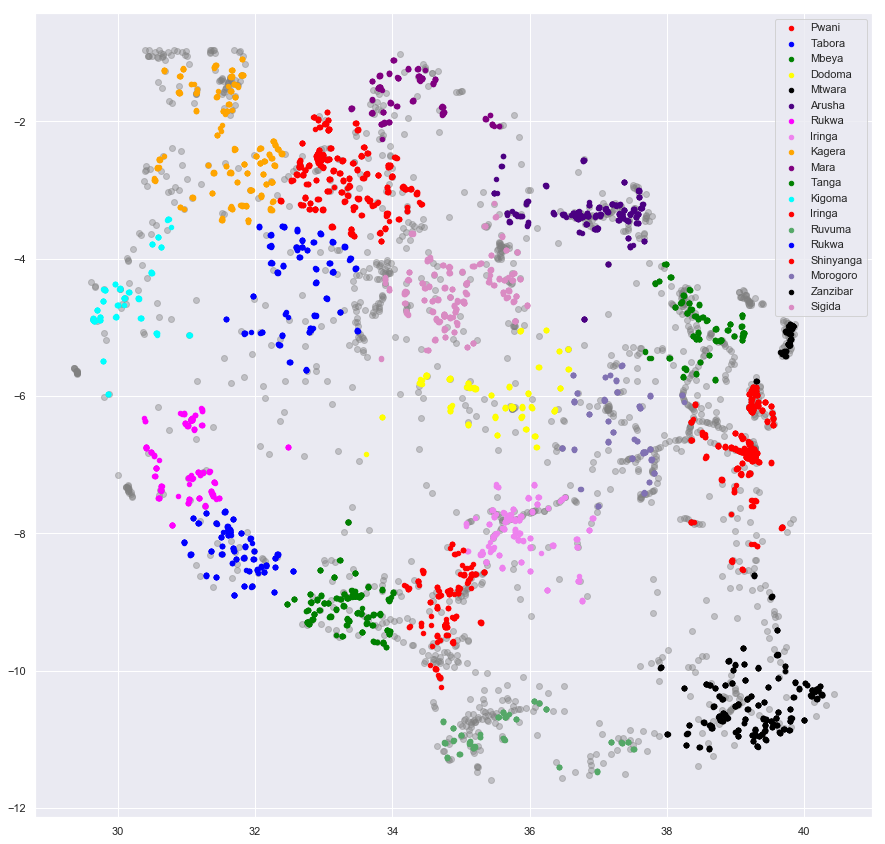

In [35]:
# Plotting a graph for training set 
# The labels were anotated directly from the above graph

fig,ax = plt.subplots(figsize=(15,15))
place_map.plot(ax=ax,alpha=0.4, color = "grey")
geo_df[geo_df['cord_clusters']==0].plot(ax=ax, markersize=20,color='red',label='Pwani')
geo_df[geo_df['cord_clusters']==1].plot(ax=ax, markersize=20,color='blue',label='Tabora')
geo_df[geo_df['cord_clusters']==2].plot(ax=ax, markersize=20,color='green',label='Mbeya')
geo_df[geo_df['cord_clusters']==3].plot(ax=ax, markersize=20,color='yellow',label='Dodoma')
geo_df[geo_df['cord_clusters']==4].plot(ax=ax, markersize=20,color='black',label='Mtwara')
geo_df[geo_df['cord_clusters']==5].plot(ax=ax, markersize=20,color='indigo',label='Arusha')
geo_df[geo_df['cord_clusters']==6].plot(ax=ax, markersize=20,color='magenta',label='Rukwa')
geo_df[geo_df['cord_clusters']==7].plot(ax=ax, markersize=20,color='violet',label='Iringa')
geo_df[geo_df['cord_clusters']==8].plot(ax=ax, markersize=20,color='orange',label='Kagera')
geo_df[geo_df['cord_clusters']==9].plot(ax=ax, markersize=20,color='purple',label='Mara')
geo_df[geo_df['cord_clusters']==10].plot(ax=ax, markersize=20,color='green',label='Tanga')
geo_df[geo_df['cord_clusters']==11].plot(ax=ax, markersize=20,color='cyan',label='Kigoma')
geo_df[geo_df['cord_clusters']==12].plot(ax=ax, markersize=20,color='red',label='Iringa')
geo_df[geo_df['cord_clusters']==13].plot(ax=ax, markersize=20,color='C2',label='Ruvuma')
geo_df[geo_df['cord_clusters']==14].plot(ax=ax, markersize=20,color='blue',label='Rukwa')
geo_df[geo_df['cord_clusters']==15].plot(ax=ax, markersize=20,color='red',label='Shinyanga')
geo_df[geo_df['cord_clusters']==16].plot(ax=ax, markersize=20,color='C4',label='Morogoro')
geo_df[geo_df['cord_clusters']==17].plot(ax=ax, markersize=20,color='black',label='Zanzibar')
geo_df[geo_df['cord_clusters']==18].plot(ax=ax, markersize=20,color='C6',label='Sigida')
plt.savefig("tanzania_mobile_money.jpg")
plt.legend()

In [36]:
# dataset based on clusters and income of region
data = [[0,'Pwani',18210,8102,28.1],[1,'Tabora',17766,10180,25.10],[2,'Mbeya',17311,9990,23.6],[3,'Dodoma',18334,11108,47.3],[4,'Mtwara',23252,11517,31.5],[5,'Arusha',20596,8517,16.7]
        ,[6,'Rukwa',8572,3564,76.70],[7,'Iringa',19187,7867,36.1],[8,'Kagera',14057,9535,32.9],[9,'Mara',13721,7350,20.8],[10,'Tanga',12210,7160,37.8],[11,'Kigoma',12334,5675,29.6]
        ,[12,'Iringa',14057,7867,36.1],[13,'Ruvuma',16848,7800,25.8],[14,'Rukwa',8572,3564,76.7],[15,'Shinyanga',16944,6873,34.8],[16,'Morogoro',18406,8563,52],
        [17,'Zanzibar',120920,50000,20],[18,'Sigida',9853,4258,24]]
income = pd.DataFrame(data=data,columns=['cord_clusters','region','household_mean_income','household_median_income','distance_to_bank'])

data above can be found here (http://atanzania.opendataforafrica.org/TZSOCECD2016/social-economics-of-tanzania-2016?region=1000080-dar-es-salaam&indicator=1002450-median-per-capita-household-monthly-income-tshs)

In [37]:
income.cord_clusters.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18], dtype=int64)

In [38]:
#including income to train set
train=train.merge(income,on='cord_clusters')

In [39]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
cord_clusters              19 non-null int64
region                     19 non-null object
household_mean_income      19 non-null int64
household_median_income    19 non-null int64
distance_to_bank           19 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 840.0+ bytes


In [40]:
# including income to the test set
test = test.merge(income,on='cord_clusters')

In [41]:
train.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,savings,borrowing,insurance,mobile_money_classification,cord_clusters,geometry,region,household_mean_income,household_median_income,distance_to_bank
0,5086,3,2,3,1,1,2,2,0,0,...,0,0,0,0,11,POINT (29.8113964 -4.46044192),Kigoma,12334,5675,29.6
1,5576,3,2,1,3,1,2,2,0,1,...,1,0,0,3,11,POINT (29.78760859 -4.61491779),Kigoma,12334,5675,29.6
2,2149,3,2,2,1,1,2,2,0,1,...,0,1,0,1,11,POINT (30.74115794 -3.42071962),Kigoma,12334,5675,29.6
3,7977,0,1,4,3,3,2,1,0,1,...,1,0,1,3,11,POINT (29.69786834 -4.74490019),Kigoma,12334,5675,29.6
4,7746,0,1,4,5,3,2,2,0,0,...,0,0,0,2,11,POINT (29.66219149 -4.90785445),Kigoma,12334,5675,29.6


In [42]:
test.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,cord_clusters,region,household_mean_income,household_median_income,distance_to_bank
0,2352,3,2,1,3,6,2,1,0,0,...,-1,1,4,-2.596421,32.913584,16,Morogoro,18406,8563,52.0
1,8003,3,2,1,3,3,2,2,0,1,...,-1,1,4,-1.856405,33.047847,16,Morogoro,18406,8563,52.0
2,270,3,1,1,6,1,2,1,0,1,...,-1,1,1,-2.525853,32.902867,16,Morogoro,18406,8563,52.0
3,1348,3,2,1,3,5,2,1,0,1,...,4,1,4,-2.546266,32.959273,16,Morogoro,18406,8563,52.0
4,4252,0,2,1,3,4,2,2,0,1,...,-1,1,4,-2.697344,33.486172,16,Morogoro,18406,8563,52.0


# categorical encoding

In [43]:
# frequecy encoding
def encoding(cols,train):
    encoding = train.groupby(cols).size()
    encoding = encoding/len(train)
    train[cols] = train[cols].map(encoding)

In [44]:
encoding('Q13',train)
encoding('cord_clusters',train)
encoding('Q15',train)

In [45]:
train.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,savings,borrowing,insurance,mobile_money_classification,cord_clusters,geometry,region,household_mean_income,household_median_income,distance_to_bank
0,5086,3,2,3,1,1,2,2,0,0,...,0,0,0,0,0.026219,POINT (29.8113964 -4.46044192),Kigoma,12334,5675,29.6
1,5576,3,2,1,3,1,2,2,0,1,...,1,0,0,3,0.026219,POINT (29.78760859 -4.61491779),Kigoma,12334,5675,29.6
2,2149,3,2,2,1,1,2,2,0,1,...,0,1,0,1,0.026219,POINT (30.74115794 -3.42071962),Kigoma,12334,5675,29.6
3,7977,0,1,4,3,3,2,1,0,1,...,1,0,1,3,0.026219,POINT (29.69786834 -4.74490019),Kigoma,12334,5675,29.6
4,7746,0,1,4,5,3,2,2,0,0,...,0,0,0,2,0.026219,POINT (29.66219149 -4.90785445),Kigoma,12334,5675,29.6


In [46]:
train.columns

Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Latitude', 'Longitude', 'mobile_money', 'savings', 'borrowing',
       'insurance', 'mobile_money_classification', 'cord_clusters', 'geometry',
       'region', 'household_mean_income', 'household_median_income',
       'distance_to_bank'],
      dtype='object')

In [47]:
# drop some columns not useful to our model
train.drop(['region','mobile_money', 'savings', 'borrowing','insurance','geometry'], inplace=True, axis = 1)

In [48]:
test=test.drop(['region'],axis=1)

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7094 entries, 0 to 7093
Data columns (total 37 columns):
ID                             7094 non-null int64
Q1                             7094 non-null int64
Q2                             7094 non-null int64
Q3                             7094 non-null int64
Q4                             7094 non-null int64
Q5                             7094 non-null int64
Q6                             7094 non-null int64
Q7                             7094 non-null int64
Q8_1                           7094 non-null int64
Q8_2                           7094 non-null int64
Q8_3                           7094 non-null int64
Q8_4                           7094 non-null int64
Q8_5                           7094 non-null int64
Q8_6                           7094 non-null int64
Q8_7                           7094 non-null int64
Q8_8                           7094 non-null int64
Q8_9                           7094 non-null int64
Q8_10                     

In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2365 entries, 0 to 2364
Data columns (total 36 columns):
ID                         2365 non-null int64
Q1                         2365 non-null int64
Q2                         2365 non-null int64
Q3                         2365 non-null int64
Q4                         2365 non-null int64
Q5                         2365 non-null int64
Q6                         2365 non-null int64
Q7                         2365 non-null int64
Q8_1                       2365 non-null int64
Q8_2                       2365 non-null int64
Q8_3                       2365 non-null int64
Q8_4                       2365 non-null int64
Q8_5                       2365 non-null int64
Q8_6                       2365 non-null int64
Q8_7                       2365 non-null int64
Q8_8                       2365 non-null int64
Q8_9                       2365 non-null int64
Q8_10                      2365 non-null int64
Q8_11                      2365 non-null int64


In [51]:
train.isnull().sum()

ID                             0
Q1                             0
Q2                             0
Q3                             0
Q4                             0
Q5                             0
Q6                             0
Q7                             0
Q8_1                           0
Q8_2                           0
Q8_3                           0
Q8_4                           0
Q8_5                           0
Q8_6                           0
Q8_7                           0
Q8_8                           0
Q8_9                           0
Q8_10                          0
Q8_11                          0
Q9                             0
Q10                            0
Q11                            0
Q12                            0
Q13                            0
Q14                            0
Q15                            0
Q16                            0
Q17                            0
Q18                            0
Q19                            0
Latitude  

In [52]:
test.isnull().sum()

ID                         0
Q1                         0
Q2                         0
Q3                         0
Q4                         0
Q5                         0
Q6                         0
Q7                         0
Q8_1                       0
Q8_2                       0
Q8_3                       0
Q8_4                       0
Q8_5                       0
Q8_6                       0
Q8_7                       0
Q8_8                       0
Q8_9                       0
Q8_10                      0
Q8_11                      0
Q9                         0
Q10                        0
Q11                        0
Q12                        0
Q13                        0
Q14                        0
Q15                        0
Q16                        0
Q17                        0
Q18                        0
Q19                        0
Latitude                   0
Longitude                  0
cord_clusters              0
household_mean_income      0
household_medi

In [53]:
len(train.columns)

37

In [54]:
len(test.columns)

36

In [58]:
IDcol='ID'
target='mobile_money_classification'
predictors = [x for x in train.columns if x not in [target, IDcol]]

In [59]:
x_train,x_test,y_train,y_test=train_test_split(train[predictors],train[target])

# Building a model

In [60]:
def train_model(x_train,x_test,y_train,y_test, alg):

    alg.fit(x_train,y_train)

    pred = alg.predict_proba(x_test)

    feat_imp = pd.Series(alg.feature_importances_,x_train.columns).sort_values(ascending=False)
    feat_imp.plot(kind="bar", title = "Feature Importance")
    plt.xlabel("features")
    plt.ylabel("Scores")
    print("Log Loss:", log_loss(y_test,pred, labels=alg.classes_))
    print()
    return alg

# GBM

Log Loss: 0.7770477623898443



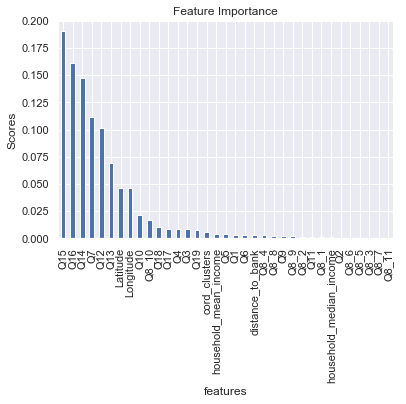

In [70]:
gbm = GradientBoostingClassifier(random_state=10)
gbm_trained_model=train_model(x_train,x_test,y_train,y_test,gbm)

# Xgboost classifier

Log Loss: 0.7752958673179536



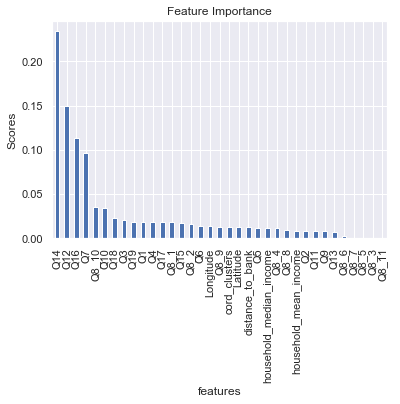

In [71]:
xgb_model=XGBClassifier(objective='Multiclass')
xgb_trained_model=train_model(x_train,x_test,y_train,y_test,xgb_model)

# catboost

In [72]:
cat_features = ['Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q14', 'Q16', 'Q17', 'Q18', 'Q19']


0:	learn: -1.3535570	total: 158ms	remaining: 2m 46s
1:	learn: -1.3266666	total: 223ms	remaining: 1m 57s
2:	learn: -1.2993645	total: 370ms	remaining: 2m 9s
3:	learn: -1.2738881	total: 442ms	remaining: 1m 55s
4:	learn: -1.2502924	total: 508ms	remaining: 1m 46s
5:	learn: -1.2295397	total: 660ms	remaining: 1m 54s
6:	learn: -1.2089312	total: 732ms	remaining: 1m 49s
7:	learn: -1.1921603	total: 779ms	remaining: 1m 41s
8:	learn: -1.1764788	total: 822ms	remaining: 1m 35s
9:	learn: -1.1596999	total: 996ms	remaining: 1m 43s
10:	learn: -1.1436668	total: 1.14s	remaining: 1m 47s
11:	learn: -1.1287707	total: 1.29s	remaining: 1m 51s
12:	learn: -1.1145575	total: 1.46s	remaining: 1m 56s
13:	learn: -1.1008924	total: 1.56s	remaining: 1m 55s
14:	learn: -1.0866578	total: 1.76s	remaining: 2m 1s
15:	learn: -1.0746506	total: 1.86s	remaining: 2m
16:	learn: -1.0632459	total: 2.07s	remaining: 2m 5s
17:	learn: -1.0522687	total: 2.16s	remaining: 2m 3s
18:	learn: -1.0414181	total: 2.37s	remaining: 2m 8s
19:	learn: -

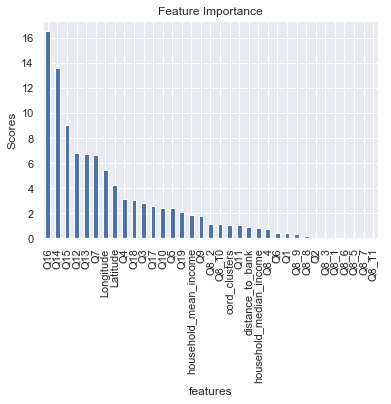

In [87]:
cat_boost = CatBoostClassifier(loss_function="MultiClass",cat_features=cat_features,
                           early_stopping_rounds=2,iterations=1050)
cat_trained_model=train_model(x_train,x_test,y_train,y_test,cat_boost)

# Making test predictions

In [79]:
#gbm best params predictions
pred_gbm=gbm_trained_model.predict_proba(test[predictors])

In [80]:
#xgbclassifier predictions
pred_xgb=xgb_trained_model.predict_proba(test[predictors])

In [88]:
#catboost predictions
cat_pred=cat_trained_model.predict_proba(test[predictors])

In [82]:
pred_gbm

array([[0.00532783, 0.04685603, 0.17693451, 0.77088163],
       [0.01839071, 0.83200456, 0.0220939 , 0.12751083],
       [0.00836763, 0.163488  , 0.03092279, 0.79722158],
       ...,
       [0.06837968, 0.42961845, 0.20396832, 0.29803354],
       [0.06730702, 0.14953483, 0.27319104, 0.50996712],
       [0.16801553, 0.42971887, 0.18905212, 0.21321348]])

In [83]:
pred_xgb

array([[0.00281036, 0.0062699 , 0.15546435, 0.8354554 ],
       [0.04156945, 0.17861146, 0.08390088, 0.6959182 ],
       [0.00192671, 0.01270134, 0.05195215, 0.93341976],
       ...,
       [0.07213154, 0.11247543, 0.22822723, 0.5871658 ],
       [0.50523865, 0.3015688 , 0.08825893, 0.10493364],
       [0.58128923, 0.3450094 , 0.02951739, 0.04418396]], dtype=float32)

In [89]:
cat_pred

array([[0.00193165, 0.00376549, 0.15120675, 0.84309611],
       [0.03700755, 0.15766787, 0.0845075 , 0.72081707],
       [0.0040801 , 0.02576448, 0.0443368 , 0.92581861],
       ...,
       [0.06613592, 0.09187994, 0.278809  , 0.56317514],
       [0.16916652, 0.196829  , 0.21888913, 0.41511535],
       [0.24271569, 0.3449392 , 0.21023146, 0.20211365]])

In [90]:
submission.columns

Index(['ID', 'no_financial_services', 'other_only', 'mm_only', 'mm_plus'], dtype='object')

In [97]:
submission[['no_financial_services', 'other_only', 'mm_only', 'mm_plus']]=cat_pred

In [98]:
submission.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.001932,0.003765,0.151207,0.843096
1,8208,0.037008,0.157668,0.084508,0.720817
2,2785,0.004080,0.025764,0.044337,0.925819
3,2967,0.000663,0.002556,0.107349,0.889432
4,1697,0.054125,0.214876,0.174375,0.556624


In [99]:
submission.to_csv('cat_sub.csv',index=False)

In [101]:
xg=pd.read_csv('gbm_sub.csv')
gb=pd.read_csv('xgb_sub.csv')
cat=pd.read_csv('cat_sub.csv')

In [102]:
comb=(xg+gb+cat)/3

In [103]:
comb.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352.0,0.003357,0.018964,0.161202,0.816478
1,8208.0,0.032323,0.389428,0.063501,0.514749
2,2785.0,0.004791,0.067318,0.042404,0.885487
3,2967.0,0.003339,0.007095,0.109708,0.879857
4,1697.0,0.056822,0.329725,0.121035,0.492419


In [104]:
comb['ID']=comb['ID'].astype('int')

In [105]:
comb.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.003357,0.018964,0.161202,0.816478
1,8208,0.032323,0.389428,0.063501,0.514749
2,2785,0.004791,0.067318,0.042404,0.885487
3,2967,0.003339,0.007095,0.109708,0.879857
4,1697,0.056822,0.329725,0.121035,0.492419


In [106]:
comb.to_csv('comb.csv',index=False)